In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}|

<IPython.core.display.Javascript object>

In [2]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import json
from IPython.display import display, Image
from specutils import Spectrum1D
from astropy import units
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from astropy.time import Time

#Import Supernovae class and relevant functions
from Supernovae import *

# iPTF16hvw Spectral Analysis


In [3]:
#Read In spectral data

#11/07/2016
spectrum1 = ascii.read('../Data/16hvw_spectra/16hvw_20161107_Gemini_N_v4.ascii')

#11/09/2016
spectrum2 = ascii.read('../Data/16hvw_spectra/16hvw_20161109_P60_v1.ascii')

#11/28/2016
spectrum3 = ascii.read('../Data/16hvw_spectra/16hvw_20161128_NOT_v1.ascii')

#12/06/2016
spectrum4 = ascii.read('../Data/16hvw_spectra/16hvw_20161206_NOT_v1.ascii')

#redshift of SN iPTF 16hvw
z_16hvw = .03663

#MJD date for maximum brightness iPTF16hvw, convert to restframe of SN
MJD_max_16hvw = 57714.40 / (1+ z_16hvw)

In [38]:
#Create Supernovae object for iPTF16hvw
iPTF16hvw = Supernovae("iPTF16hvw" , z_16hvw, MJD_max_16hvw)

#Create Spectra objects - includes correcting flux for redshift, normalizing, and shifting wavelength to restframe
Spec_16hvw1 = Spectra(spectrum1, convert_date_toMJD('2016-11-7') / (1+z_16hvw) , z_16hvw, MJD_max_16hvw,  )
Spec_16hvw2 = Spectra(spectrum2, convert_date_toMJD('2016-11-9') / (1+z_16hvw), z_16hvw, MJD_max_16hvw,  )
Spec_16hvw3 = Spectra(spectrum3, convert_date_toMJD('2016-11-28') / (1+z_16hvw), z_16hvw, MJD_max_16hvw,  )
Spec_16hvw4 = Spectra(spectrum4,convert_date_toMJD('2016-12-6') / (1+z_16hvw), z_16hvw, MJD_max_16hvw,  )

#Store Spectra objects in corresponding supernovae
iPTF16hvw.store_spectra(Spec_16hvw1)
iPTF16hvw.store_spectra(Spec_16hvw2)
iPTF16hvw.store_spectra(Spec_16hvw3)
iPTF16hvw.store_spectra(Spec_16hvw4)


13.119435092557978

### Plotting Spectra 


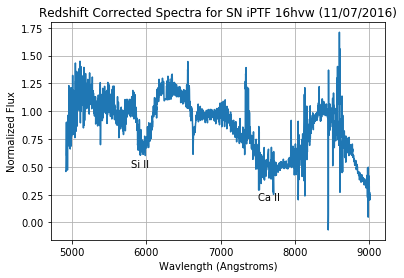

In [5]:
#Create plot of 16hvw spectra (-16.5 days)
hvw1_wavelength = iPTF16hvw.spectra[0].data['Wavelength']
hvw1_flux = iPTF16hvw.spectra[0].data['Flux']


plt.plot(hvw1_wavelength, hvw1_flux)
plt.xlabel('Wavlength (Angstroms)')
plt.title('Redshift Corrected Spectra for SN iPTF 16hvw (11/07/2016)')
plt.ylabel('Normalized Flux')
plt.grid()

#Add text indicating Absorption lines
plt.text(5800, .5, "Si II")
plt.text(7500,.20, "Ca II")


#Save and show figure
plt.savefig('../Images/16hvw_Spectra_plots/16hvw_20161107_spectra')
plt.show()

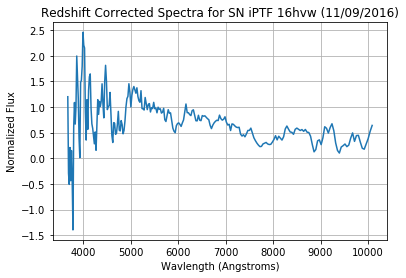

In [6]:
#Create plot of 16hvw spectra (-14.5 days)
hvw2_wavelength = iPTF16hvw.spectra[1].data['Wavelength']
hvw2_flux = iPTF16hvw.spectra[1].data['Flux']

plt.plot(hvw2_wavelength, hvw2_flux)
plt.xlabel('Wavlength (Angstroms)')
plt.title('Redshift Corrected Spectra for SN iPTF 16hvw (11/09/2016)')
plt.ylabel('Normalized Flux')

plt.grid()

#Add text indicating Absorption lines

'''
plt.text(6000, 0e-16, "Si II")
plt.text(7900, -.2e-16, "Ca II")
plt.text(4700,-.1e-16,"Fe II")
plt.text(5600, 3e-16,"S II")
plt.text(3800, -1.9e-16, "Ca II")
plt.text(4200, 2.1e-16, "Fe II")
'''

#Save and show figure
plt.savefig('../Images/16hvw_Spectra_plots/16hvw_20161109_spectra')
plt.show()

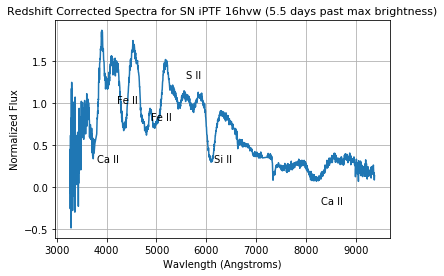

In [7]:
#Create plot of 16hvw spectra (+5.5 days)
hvw3_wavelength = iPTF16hvw.spectra[2].data['Wavelength']
hvw3_flux = iPTF16hvw.spectra[2].data['Flux']

plt.plot(hvw3_wavelength, hvw3_flux)
plt.xlabel('Wavlength (Angstroms)')
plt.title('Redshift Corrected Spectra for SN iPTF 16hvw (5.5 days past max brightness)', fontsize=11)
plt.ylabel('Normalized Flux')

plt.grid()

#Add text indicating Absorption lines
plt.text(6150, .3, "Si II")
plt.text(8300, -0.2, "Ca II")
plt.text(4900, .8,"Fe II")
plt.text(5600, 1.3,"S II")
plt.text(3800, .3, "Ca II")
plt.text(4200, 1, "Fe II")

#Save and show figure
plt.savefig('../Images/16hvw_Spectra_plots/16hvw_20161128_spectra')
plt.show()

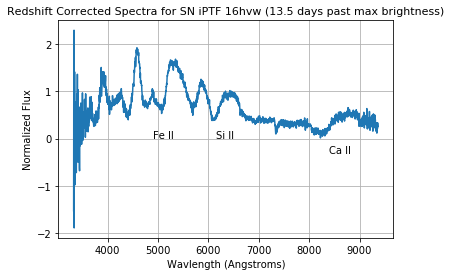

In [8]:
#Create plot of 16hvw spectra (+13.5 days)
hvw4_wavelength = iPTF16hvw.spectra[3].data['Wavelength']
hvw4_flux = iPTF16hvw.spectra[3].data['Flux']

plt.plot(hvw4_wavelength, hvw4_flux)
plt.xlabel('Wavlength (Angstroms)')
plt.title('Redshift Corrected Spectra for SN iPTF 16hvw (13.5 days past max brightness)', fontsize=11)
plt.ylabel('Normalized Flux')


plt.grid()

#Add text indicating Absorption lines
plt.text(6150, .2e-16, "Si II")
plt.text(8400, -.3, "Ca II")
plt.text(4900, .6e-16,"Fe II")
#plt.text(5600, 3e-16,"S II")
#plt.text(3800, .8e-16, "Ca II")
#plt.text(4200, 2.1e-16, "Fe II")

#Save and show figure
plt.savefig('../Images/16hvw_Spectra_plots/16hvw_20161206_spectra')
plt.show()

### Estimate Absorption Velocities



In [9]:
#Estimate absorption velocities 

#store restframe wavelengths of absorption in Angstroms
SiII_restframe = 6355

#Ca II is a triplet - used the average wavelength 
CaII_restframe = (8498 + 8542 + 8662) / float(3)

#speed of light (km/s)
c = 3e5 

#store absorption minimum wavelength for Si II, Ca II lines; estimated minimum from pandas dataframe
#Divided by 1+z to convert doppler shifted wavelengths to the SN restframe 


SiII_absorption_minimum_1 = 6203 / (1 + z_16hvw)
CaII_absorption_minimum_1 = 7996 / (1 + z_16hvw)


SiII_absorption_minimum_2 = 6152 / (1 + z_16hvw)
CaII_absorption_minimum_2 = 8004 / (1 + z_16hvw)


SiII_absorption_minimum_3 = 6317 / (1 + z_16hvw)
CaII_absorption_minimum_3 = 8505 / (1 + z_16hvw)


SiII_absorption_minimum_4 = 6322 / (1 + z_16hvw)
CaII_absorption_minimum_4 = 8561 / (1 + z_16hvw)

In [10]:
#Calculate SiII absorption velocities (km/s)
print(calc_abs_velc(SiII_restframe, SiII_absorption_minimum_1))
print(calc_abs_velc(SiII_restframe, SiII_absorption_minimum_2))
print(calc_abs_velc(SiII_restframe, SiII_absorption_minimum_3))
print(calc_abs_velc(SiII_restframe, SiII_absorption_minimum_4))

17522.5995772
19845.0802191
12331.17226
12103.4780795


In [11]:
#Calculate CaII absorption velocities (km/s)
print(calc_abs_velc(CaII_restframe, CaII_absorption_minimum_1))
print(calc_abs_velc(CaII_restframe, CaII_absorption_minimum_2))
print(calc_abs_velc(CaII_restframe, CaII_absorption_minimum_3))
print(calc_abs_velc(CaII_restframe, CaII_absorption_minimum_4))

29899.9886136
29629.7534846
12706.2785341
10814.6326314


# SN2011fe Spectral Analysis

In [12]:
#Redshift of 2011fe gathered from OSN
z_2011fe = 0.000804
#MJD date for maximum brightness SN2011fe
MJD_max_2011fe = 55814 / (1 + z_2011fe)

#MJD date for iPTF16hvw spectra of interest
#11/28/16
date1 = 57720

#12/06/16
date2 = 57728



#MJD days past maximum 

#phase of iPTF16hvw 11/28/16 spectra
dpm1 = date1 - MJD_max_16hvw

#phase of iPTF16hvw 12/06/16 spectra
dpm2 = date2 - MJD_max_16hvw

In [13]:
SN2011fe = create_SN_object('SN2011fe.json', MJD_max_2011fe, z_2011fe)

In [14]:
Comp_2011fe1 = SN2011fe.find_spectra(4)
Comp_2011fe1.data

,Flux,Wavelength
0,0.718661,3296.029992
1,0.697587,3298.408080
2,0.691074,3300.786168
3,0.692859,3303.164256
4,0.698256,3305.542344
5,0.700964,3307.920432
6,0.704151,3310.298520
7,0.709501,3312.676608
8,0.719913,3315.054696
9,0.719742,3317.432784


In [15]:
rel_flux_indices = np.where(np.logical_and(5000< Comp_2011fe1.data['Wavelength'] , Comp_2011fe1.data['Wavelength']< 6000))
average = np.average(Comp_2011fe1.data.iloc[rel_flux_indices]['Flux'])
Comp_2011fe1.data['Flux'] = Comp_2011fe1.data['Flux'] / average

# Comparing iPTF16hvw and SN2011fe

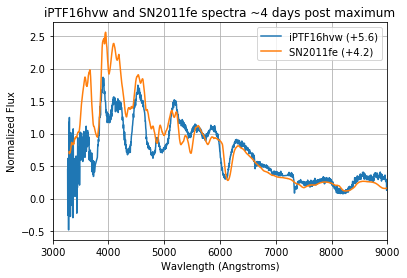

In [16]:
#Plot iPTF16hvw spectra
f, ax = plt.subplots()
plt.plot(hvw3_wavelength, hvw3_flux, label='iPTF16hvw (+5.6)')


#plot SN2011fe spectra 
plt.plot(Comp_2011fe1.data['Wavelength'], Comp_2011fe1.data['Flux'], label='SN2011fe (+4.2)')
plt.grid()


plt.legend()

plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2011fe spectra ~4 days post maximum')
plt.ylabel('Normalized Flux')
plt.xlim([3000, 9000])

plt.savefig('../Images/2011fe_vs_16hvw//2011fe_comparison_spectra_4days')

plt.show()

In [17]:
#Plot iPTF16hvw spectra
f2, ax2 = plt.subplots()
plt.plot(hvw4_wavelength ,hvw4_flux, label='iPTF16hvw (+13.6)')
plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2011fe spectra ~13 days post maximum')
plt.ylabel('Normalized Flux')

#plot SN2011fe spectra 
plt.plot(Comp_2011fe2.data['Wavelength'], Comp_2011fe2.data['Flux'], label='SN2011fe (+14.2)')
plt.legend()
plt.savefig('../Images/2011fe_vs_16hvw//2011fe_comparison_spectra_12days')
plt.grid()
plt.show()

NameError: name 'Comp_2011fe2' is not defined

#  SN2002dj Spectral Analysis

In [18]:
#store 2002dj redshift
z_2002dj = 0.009393
 
#Store 2002dj B band maximum date
MJD_max_2002dj = 52450 / (1 + z_2002dj)



In [19]:
#Grab 2002dj spectra with phases near 5.6 days past maximum
SN2002dj = create_SN_object('SN2002dj.json', MJD_max_2002dj, z_2002dj)

In [20]:
#Create 2002dj comparison spectral objects 
Comp_2002dj1 = SN2002dj.find_spectra(5.6)
Comp_2002dj2 = SN2002dj.find_spectra(13.6)

In [21]:
Comp_2002dj2.phase

11.888332889175217

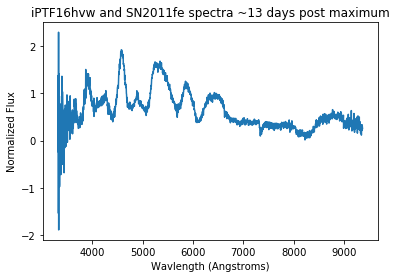

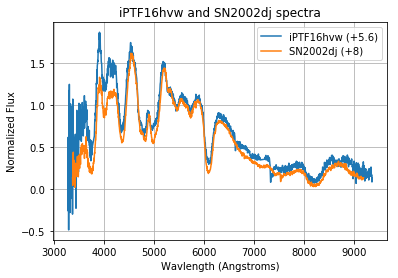

In [22]:
#Plot iPTF16hvw spectra
plt.figure()
plt.plot(hvw3_wavelength, hvw3_flux, label='iPTF16hvw (+5.6)')
plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2002dj spectra')
plt.ylabel('Normalized Flux')


#plot SN2002dj spectra 
plt.plot(Comp_2002dj1.data['Wavelength'], Comp_2002dj1.data['Flux'], label='SN2002dj (+8)')
plt.legend()
plt.savefig('../Images/2002dj_vs_16hvw/2002dj_comparison_spectra_8days')
plt.grid()
plt.show()

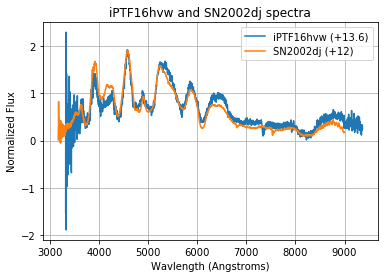

In [23]:
#Plot iPTF16hvw spectra
plt.figure()
plt.plot(hvw4_wavelength, hvw4_flux, label='iPTF16hvw (+13.6)')
plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2002dj spectra')
plt.ylabel('Normalized Flux')


#plot SN2002dj spectra 

plt.plot(Comp_2002dj2.data['Wavelength'], Comp_2002dj2.data['Flux'], label='SN2002dj (+12)')
plt.legend()
plt.savefig('../Images/2002dj_vs_16hvw/2002dj_comparison_spectra_16days')
plt.grid()
plt.show()

# SN2002bo Spectral Analysis


In [24]:
#Store redshift of SN2002bo
z_2002bo = .0044
#Store date of B bandmax brightness SN2002ob
MJD_max_2002bo = 52356 / (1+z_2002bo)



In [25]:
SN2002bo = create_SN_object('SN2002bo.json', MJD_max_2002bo, z_2002bo)

In [26]:
#Run loop to look at SN2002bo spectra of interest
#for i in range(len(SN2002bo.spectra)):
 #   print(i, SN2002bo.spectra[i].phase)

In [27]:
#Create 2002dj comparison spectral objects 
Comp_2002bo1 = SN2002bo.find_spectra(5.6)
Comp_2002bo2 = SN2002bo.find_spectra(13.6)


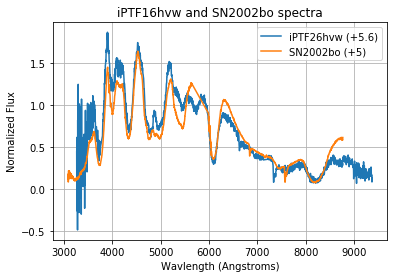

In [28]:
#Plot iPTF16hvw spectra
plt.figure()
plt.plot(hvw3_wavelength, hvw3_flux, label='iPTF26hvw (+5.6)')
plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2002bo spectra')
plt.ylabel('Normalized Flux')


#plot SN2002bo spectra 
plt.plot(Comp_2002bo1.data['Wavelength'], Comp_2002bo1.data['Flux'], label='SN2002bo (+5)')
plt.legend()
plt.savefig('../Images/2002bo_vs_16hvw/2002bo_comparison_spectra_5days')
plt.grid()
plt.show()

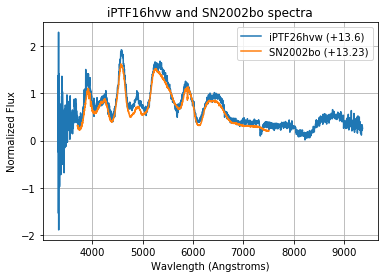

In [29]:
#Plot iPTF16hvw spectra
plt.figure()
plt.plot(hvw4_wavelength, hvw4_flux, label='iPTF26hvw (+13.6)')
plt.xlabel('Wavlength (Angstroms)')
plt.title('iPTF16hvw and SN2002bo spectra')
plt.ylabel('Normalized Flux')


#plot SN2002bo spectra 
plt.plot(Comp_2002bo2.data['Wavelength'], Comp_2002bo2.data['Flux'], label='SN2002bo (+13.23)')
plt.legend()
plt.savefig('../Images/2002bo_vs_16hvw/2002bo_comparison_spectra_13days')
plt.grid()
plt.show()

# iPTF16hvw Equivalent Width and Absorption Velocity Measurements

In [40]:
#Define a gaussian profile function to fit to the absorption line data
def Gaussian_profile(w, a, b, c, d, e):
    return a + b*w + c*np.exp(-((w - d)**2)/ e)
def Gauss(w , c, d, e):
        return c*np.exp(-((w - d)**2)/ e)

def Gauss(w , c, d, e):
        return c*np.exp(-((w - d)**2)/ e)

#Define a function to trim spectral data to capture absorption line
def Trim(spectra, start, stop):
    '''
    spectra - Spectral object 
    start - starting wavelength
    stop - stop wavelength
    '''
    return spectra.data.drop(spectra.data[(spectra.data.Wavelength <start) | (spectra.data.Wavelength > stop)].index)
   
def Calc_EW(Absorption, *popt):
    '''
    Absorption - trimmed Spectra of absorption line
    *popt - best fit parameters for gaussian fit
    '''
    index1 = np.argmin(Absorption['Wavelength'])
    index2 = np.argmax(Absorption['Wavelength'])
    cont_int = (Absorption['Flux'][index1] + Absorption['Flux'][index2])/2
    return integrate.quad(lambda x: Gauss(x, *popt[2:5]), -10000,10000) / -cont_int
    

def Calc_Centroid(Absorption ,*popt):
    '''
    Absorption - trimmed Spectra of absorption line
    *popt - best fit parameters for gaussian fit
    '''
    
    
    
    minim = np.min(Absorption['Wavelength'])
    maxim = np.max(Absorption['Wavelength']) 
    return integrate.quad(lambda x:  x * Gauss(x, *popt[2:5]), minim, maxim)[0] / integrate.quad(lambda x:  Gauss(x, *popt[2:5]), minim, maxim)[0]

    

### Si II 6355 EW measurement

In [41]:
#Trim data of iPTF16hvw near Si II 6355 absorption line

#11/07/2016 spectra
SiII_1_6355 = Trim(iPTF16hvw.spectra[0], 5750, 6250)

#11/28/16 spectra
SiII_3_6355 = Trim(iPTF16hvw.spectra[2], 5900, 6300)

#12/06/16 spectra
SiII_4_6355 = Trim(iPTF16hvw.spectra[3], 5900, 6350)


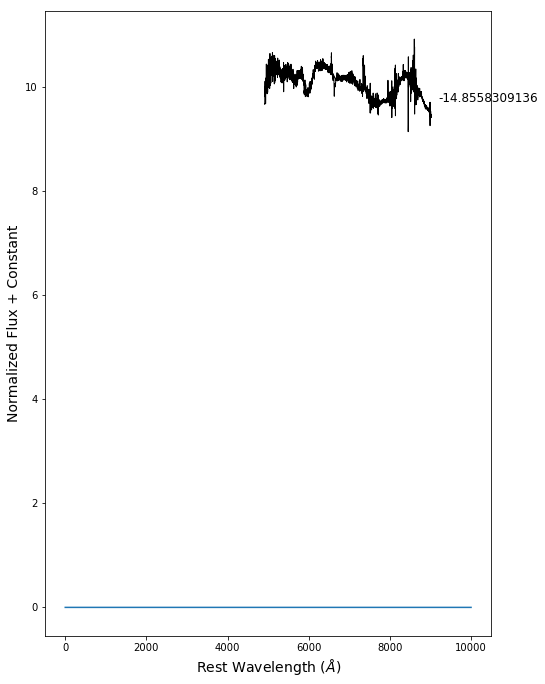

In [42]:
#Find the best fit parameters
popt1, pcov1 = curve_fit(Gaussian_profile, SiII_1_6355['Wavelength'], SiII_1_6355['Flux'], p0=[0, -2, 0, 5950, 1])
popt3, pcov3 = curve_fit(Gaussian_profile, SiII_3_6355['Wavelength'], SiII_3_6355['Flux'], p0=[0, -2, 0, 6100, 1])
popt4, cov4 = curve_fit(Gaussian_profile, SiII_4_6355['Wavelength'], SiII_4_6355['Flux'], p0=[0,-2,0,6100,1])

x = np.linspace(0, 10000, 1000)

plt.plot(x, Gauss(x, *popt4[2:5]) )
plt.show()


In [43]:
#Plot Fits
x1 = np.arange(5750, 6250, 1)
x3 = np.arange(5900, 6300, 1)
x4 = np.arange(5900, 6350,1)

y1 = Gaussian_profile(x1, *popt1)
y3 = Gaussian_profile(x3, *popt3)
y4 = Gaussian_profile(x4, *popt4)

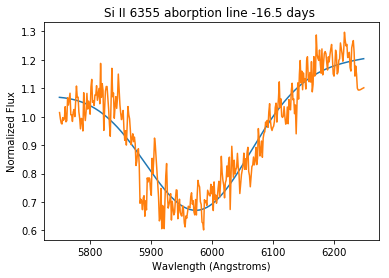

In [44]:
#Si II 6355 absorption line at -16.5 phase

plt.figure()
plt.plot(x1,y1)
plt.plot(SiII_1_6355['Wavelength'],SiII_1_6355['Flux'])
plt.xlabel('Wavlength (Angstroms)')
plt.ylabel('Normalized Flux')
plt.title("Si II 6355 aborption line -16.5 days ")
plt.show()

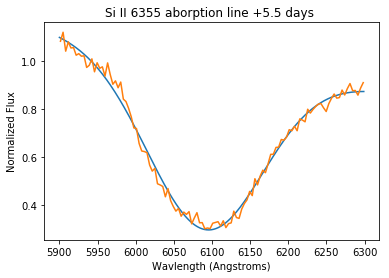

In [45]:
#Si II 6355 absorption line at +5.5 phase
plt.figure()
plt.plot(x3,y3)
plt.plot(SiII_3_6355['Wavelength'],SiII_3_6355['Flux'])
plt.xlabel('Wavlength (Angstroms)')
plt.ylabel('Normalized Flux')
plt.title("Si II 6355 aborption line +5.5 days ")
plt.show()

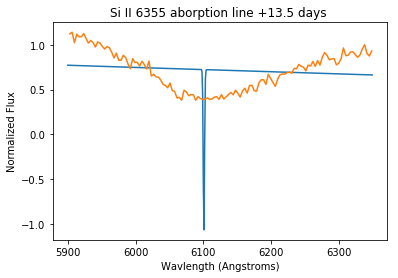

In [46]:
#Si II 6355 absorption line at +13.5 phase
plt.figure()
plt.plot(x4,y4)
plt.plot(SiII_4_6355['Wavelength'], SiII_4_6355['Flux'])
plt.xlabel('Wavlength (Angstroms)')
plt.ylabel('Normalized Flux')
plt.title("Si II 6355 aborption line +13.5 days ")
plt.show()

# <center> $W_{\lambda} = \int (\frac{F_{0}- F_{\lambda}}{F_{0}} )d\lambda = \int (1 - \frac{F_{\lambda}}{F_{0}} )d\lambda$ </centering>

In [47]:
#Calculate Equivalent Widths
EW_1 = Calc_EW(SiII_1_6355, *popt1)
EW_3 = Calc_EW(SiII_3_6355, *popt3)
EW_4 = Calc_EW(SiII_4_6355, *popt4)

/Users/ethanmarx/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/Users/ethanmarx/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [48]:
print("EW of SiII 6355 -16.5 days:    "  + str(EW_1[0]) + " Angstroms")
print("EW of SiII 6355 5.5 days:     "  + str(EW_3[0]) + " Angstroms")
print("EW of SiII 6355 13.5 days:     "  + str(EW_4[0]) + " Angstroms")

EW of SiII 6355 -16.5 days:    95.44032588561211 Angstroms
EW of SiII 6355 5.5 days:     136.84961453406174 Angstroms
EW of SiII 6355 13.5 days:     0.0 Angstroms


In [49]:
#Calculate centroid of function
centroid_1 = Calc_Centroid(SiII_1_6355, *popt1)
centroid_3 = Calc_Centroid(SiII_3_6355, *popt3)
centroid_4 = Calc_Centroid(SiII_4_6355, *popt4)

In [50]:
print(centroid_1 , popt1[3])
print(centroid_3, popt3[3])
print(centroid_4, popt4[3])

(5978.385939778704, 5977.568714824641)
(6091.422319254486, 6090.79108759512)
(6100.765696185494, 6100.765696185494)


In [51]:
#calculate absorption velocities using centroid as doppler shifted wavelength
print("Si II absorption velocity -16.5 days:   " + str(calc_abs_velc(SiII_restframe, centroid_1)) + " km/s")
print("Si II absorption velocity +5.5 days:   " + str(calc_abs_velc(SiII_restframe, centroid_3))+ " km/s")
print("Si II absorption velocity +13.5 days:   "  + str(calc_abs_velc(SiII_restframe, centroid_4))+ " km/s")

Si II absorption velocity -16.5 days:   17778.7911985 km/s
Si II absorption velocity +5.5 days:   12442.6914593 km/s
Si II absorption velocity +13.5 days:   12001.6193776 km/s


### Si II 5972 EW measurement

In [52]:
#Trim data of iPTF16hvw near Si II 6355 absorption line
#11/07/2016 spectra
SiII_1_5972 = Trim(iPTF16hvw.spectra[0], 5500, 5800)

#11/28/16 spectra
SiII_3_5972 = Trim(iPTF16hvw.spectra[2], 5600, 5850)

#12/06/16 spectra
SiII_4_5972 = Trim(iPTF16hvw.spectra[3], 5450, 5900)


In [53]:
#Find the best fit parameters
popt1_5972, pcov1_5972 = curve_fit(Gaussian_profile, SiII_1_5972['Wavelength'], SiII_1_5972['Flux'], p0=[0, -2, 0, 5600, 1])
popt3_5972, pcov3_5972 = curve_fit(Gaussian_profile, SiII_3_5972['Wavelength'], SiII_3_5972['Flux'], p0=[0, -2, 0, 5750, 3])
popt4_5972, pcov4_5972 = curve_fit(Gaussian_profile, SiII_4_5972['Wavelength'], SiII_4_5972['Flux'], p0=[0,-1,0,5700,3])

In [54]:
#Plot Fits
x1_5972 = np.arange(5500, 5900, 1)
x3_5972 = np.arange(5600, 5850, 1)
x4_5972 = np.arange(5500, 5900, 1)

y1_5972 = Gaussian_profile(x1_5972, *popt1_5972)
y3_5972 = Gaussian_profile(x3_5972, *popt3_5972)
y4_5972= Gaussian_profile(x4_5972, *popt4_5972)

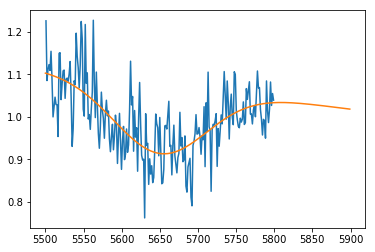

In [55]:
plt.plot(SiII_1_5972['Wavelength'], SiII_1_5972['Flux'])
plt.plot(x1_5972, y1_5972)
plt.show()

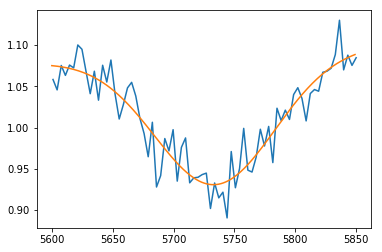

In [56]:
plt.plot(SiII_3_5972['Wavelength'], SiII_3_5972['Flux'])
plt.plot(x3_5972, y3_5972)
plt.show()

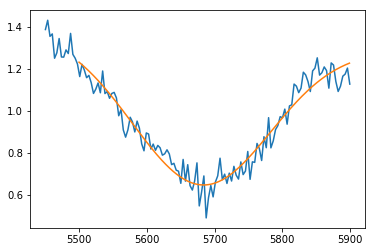

In [57]:
plt.plot(SiII_4_5972['Wavelength'], SiII_4_5972['Flux'])
plt.plot(x4_5972, y4_5972)
plt.show()

In [58]:
#Calculate Equivalent Widths
EW_1_5972 = Calc_EW(SiII_1_5972, *popt1_5972)
EW_3_5972 = Calc_EW(SiII_3_5972, *popt3_5972)
EW_4_5972 = Calc_EW(SiII_4_5972, *popt4_5972)

In [59]:
print("EW of SiII 5972 -16.5 days:    "  + str(EW_1_5972[0]) + " Angstroms")
print("EW of SiII 5972 +5.5 days:    "  + str(EW_3_5972[0]) + " Angstroms")
print("EW of SiII 5972 +13.5 days:    "  + str(EW_4_5972[0]) + " Angstroms")

EW of SiII 5972 -16.5 days:    21.749833141116145 Angstroms
EW of SiII 5972 +5.5 days:    18.34173565880367 Angstroms
EW of SiII 5972 +13.5 days:    140.8887785334912 Angstroms


In [60]:
#Calculate centroid of function
centroid_1_5972 = Calc_Centroid(SiII_1_5972, *popt1_5972)
centroid_3_5972 = Calc_Centroid(SiII_3_5972, *popt3_5972)
centroid_4_5972 = Calc_Centroid(SiII_4_5972, *popt4_5972)

In [61]:
SiII_restframe_5972 = 5972
#calculate absorption velocities using centroid as doppler shifted wavelength
print("Si II 5972 absorption velocity -16.5 days:   " + str(calc_abs_velc(SiII_restframe_5972, centroid_1_5972)) + " km/s")
print("Si II 5972 absorption velocity +5.5 days:   " + str(calc_abs_velc(SiII_restframe_5972, centroid_3_5972))+ " km/s")
print("Si II 5972 absorption velocity +13.5 days:   "  + str(calc_abs_velc(SiII_restframe_5972, centroid_4_5972))+ " km/s")

Si II 5972 absorption velocity -16.5 days:   16160.4993753 km/s
Si II 5972 absorption velocity +5.5 days:   11994.5367152 km/s
Si II 5972 absorption velocity +13.5 days:   14670.9041688 km/s


# iPTF 16hvw spectral sequences

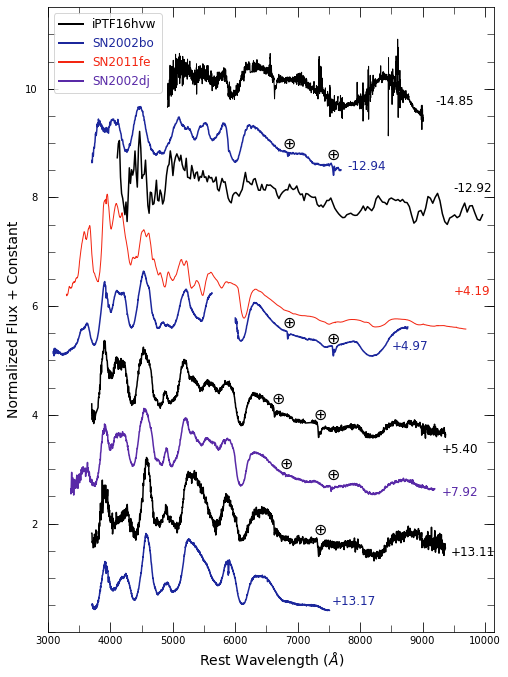

In [133]:
#Create figure
f, ax = plt.subplots(figsize=(8,11.5))

#Set axes labels
plt.ylabel('Normalized Flux + Constant', fontsize=14)
plt.xlabel('Rest Wavelength ($\AA$)', fontsize=14)


#plot 1st iptf16hvw spectra
plt.plot(hvw1_wavelength, hvw1_flux + 9.2, color='black', lw=1 , label="iPTF16hvw")
plt.text(9200, 9.7, str(iPTF16hvw.spectra[0].phase)[0:6], fontsize=12,color='black')


#plot 1st 2002bo spectra
Fig1_2002bo_trimmed = Trim(Fig1_2002bo, 3700, 10000)
plt.plot(Fig1_2002bo_trimmed['Wavelength'], Fig1_2002bo_trimmed['Flux'] + 8.2, color='#1c279c' ,lw=1.5, label='SN2002bo')
plt.text(7800, 8.5, str(Fig1_2002bo.phase)[0:6], fontsize=12, color='#1c279c')


#plot 1st 2011fe spectra
plt.plot(Comp_2011fe1.data['Wavelength'], Comp_2011fe1.data['Flux'] +5.5, color='#f32612', lw=1, label='SN2011fe')
plt.text(9500, 6.2, "+" + str(Comp_2011fe1.phase)[0:4], fontsize=12, color='#f32612')

#plot 1st 2002dj spectra
plt.plot(Comp_2002dj1.data['Wavelength'], Comp_2002dj1.data['Flux'] +2.5, color='#592aa7', label= "SN2002dj",lw=1.5)
plt.text(9300, 2.5, "+" + str(Comp_2002dj1.phase)[0:4], fontsize=12, color='#592aa7')



#change linewidths in legend
leg = ax.legend(loc=2, fontsize=12)
for line in leg.get_lines():
    line.set_linewidth(2.0)
    
#change labels in legend        
labels = leg.get_texts()
labels[1].set_color('#1c279c')
labels[2].set_color('#f32612')
labels[3].set_color('#592aa7')



#plot 2nd 16hvw spectra
hvw2_trimmed = Trim(iPTF16hvw.spectra[1], 4100, 10000)
plt.plot(hvw2_trimmed['Wavelength'], hvw2_trimmed['Flux'] + 7.4, color='black', lw=1.5)
plt.text(9500, 8.1 ,  str(iPTF16hvw.spectra[1].phase)[0:6], fontsize=12, color='black')

#plot 3rd 16hvw spectra
hvw3_trimmed = Trim(iPTF16hvw.spectra[2], 3700, 10000)
plt.plot(hvw3_trimmed['Wavelength'], hvw3_trimmed['Flux'] + 3.5, color='black', lw=1.5)
plt.text(9300, 3.3, "+" + str(iPTF16hvw.spectra[2].phase)[0:4], fontsize=12,  color='black')

#plot 4th 16hvw spectra
hvw4_trimmed = Trim(iPTF16hvw.spectra[3], 3700, 10000)
plt.plot(hvw4_trimmed['Wavelength'], hvw4_trimmed['Flux']+1.3 , color='black', lw=1.5 )
plt.text(9450, 1.4, "+" + str(iPTF16hvw.spectra[3].phase)[0:5], fontsize=12, color='black')




#plot 2nd 2002bo spectra
Comp_2002bo1_trimmed1 = Trim(Comp_2002bo1, 0, 5627)
Comp_2002bo1_trimmed2 = Trim(Comp_2002bo1, 6000, 10000)
plt.plot(Comp_2002bo1_trimmed1['Wavelength'], Comp_2002bo1_trimmed1['Flux'] + 5, color='#1c279c' , lw=1.5)
plt.plot(Comp_2002bo1_trimmed2['Wavelength'], Comp_2002bo1_trimmed2['Flux'] + 5, color='#1c279c' , lw=1.5)
plt.text(8500, 5.2, "+" + str(Comp_2002bo1.phase)[0:4], fontsize=12, color='#1c279c')

#plot 3rd 2002bo spectra
plt.plot(Comp_2002bo2.data['Wavelength'], Comp_2002bo2.data['Flux'] +.2, color='#1c279c', lw=1.5)
plt.text(7550, .5, "+" + str(Comp_2002bo2.phase)[0:5], fontsize=12, color='#1c279c')




#include note of atmospheric absorption lines
plt.text(7450, 5.3 , '$\oplus$', fontsize =16)
plt.text(6750, 5.6 , '$\oplus$', fontsize = 16)
plt.text(7250, 3.9 , '$\oplus$', fontsize = 16)
plt.text(7250, 1.8, '$\oplus$', fontsize =16)
plt.text(7450,8.7 , '$\oplus$', fontsize = 16)
plt.text(6750,8.9, '$\oplus$', fontsize = 16)
plt.text(6570,4.2, '$\oplus$', fontsize = 16)
plt.text(6700,3. , '$\oplus$', fontsize = 16)
plt.text(7450,2.8, '$\oplus$', fontsize = 16)

#set major and minor ticks
xticks = np.linspace(3500, 9500, 7)
yticks = np.linspace(0, 11, 23)

plt.xlim([3000, 10150])
plt.ylim([0,11.5])
plt.tick_params(direction="in" ,length=10,top=True, right=True,which='major' )
ax.tick_params(axis='y', pad=10)
ax.set_xticks(xticks, minor=True)

locs, labels = plt.yticks()
plt.yticks([2,4,6,8,10])

ax.set_yticks(yticks,  minor=True)
#ax.set_yticklabels()
plt.tick_params(direction="in" ,length=7,top=True, right=True,which='minor' )
plt.savefig('../paper/figures/figure1.pdf')

plt.show()